
## Part 1 - Questions

### Question 1: 

What is the best weapon for each category in Dark Souls III? Category includes something like Straight Swords and Katanas

* Who (population): Dark Soul III
* What (subject, discipline): damage/weight ratio for attacking weapons, physical defense reduction and stability for sheilds, damge/range for range weapons, spell buff for magic and faith weapons
* Where (location): In game
* When (snapshot, longitudinal): The current patch of Dark Souls III. Regulation 1.35 APP Version 1.15 - 25 August 2017
* How much data do you need to do the analysis/work: sheilds

### Question 2: 

What is the best sheild when facing enmeies with different types of attacks. e.g. (fire, dark ...)

* Who (population): Dark Soul III sheilds
* What (subject, discipline): the highest damage reduction in different types of damages
* Where (location): In game
* When (snapshot, longitudinal): The current patch of Dark Souls III. Regulation 1.35 APP Version 1.15 - 25 August 2017
* How much data do you need to do the analysis/work: all weapons


### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Gamers, collecting data from Dark Souls III wiki

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: ⚔️ | Dark Souls 3 Weapons
2. Link to Data: https://www.kaggle.com/datasets/l3llff/-dark-souls-3-weapon
3. Source / Origin: 
	* Author or Creator: l3LlFF
	* Publication Date: April 30, 2022
	* Publisher: kaggle
	* Version or Data Accessed: Version 1
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes


### Overview

* Format: csv
* Size: 37 KB
* Number of Records: 288



### Sample of Data




In [2]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
import csv
file = open('DS3_weapon.csv', 'r')
reader = csv.reader(file)
print("The first 5 lines of the data")
for line in range(5):
    print(next(reader))

The first 5 lines of the data
['Name', 'Category', 'Reinforcement', 'Damage', 'Damage Reduction', 'Aux Effects', 'Stat Requirements', 'Stat Bonuses', 'Critical', 'Weight', 'Stability', 'Durability', 'Sell Price', 'Spell Buff', 'Range', 'Buffable', 'Infusable']
['Fist', 'Fists', 'Regular', '20/0/0/0/0', '0/0/0/0/0', '0/0/0', '0/0/0/0', '-/-/-/-', '100', '0', '0', '0', '0', 'N/A', 'N/A', 'No', 'No']
['Dragonhead Shield', 'Small Shields', 'Boss', '116/0/12/0/0', '70/65/90/35/55', '0/0/0', '12/0/11/12', 'D/-/E/E', '100', '4.5', '40', '85', '500', 'N/A', 'N/A', 'Yes', 'No']
['Dragonhead Greatshield', 'Greatshields', 'Boss', '145/0/0/0/0', '100/55/90/30/55', '0/0/0', '35/0/0/15', 'D/-/-/E', '100', '18.0', '60', '150', '500', 'N/A', 'N/A', 'Yes', 'No']
['White Birch Bow', 'Bows', 'Unique', '82/0/0/0/0', '-/-/-/-/-', '0/0/0', '8/20/0/0', 'E/D/-/-', '100', '2.5', '-', '50', '300', 'N/A', '49', 'No', 'No']


### Fields or Column Headers

* Field/Column 1: Name - name of weapon **String**
* Field/Column 2: Category - category of weapon **String**
* Field/Column 3: Reinforcement - reinforcement path (Regular, Unique and Boss) **String**
* Field/Column 4: Damage - damage of weapon (P = Physical, M = Magic, F = Fire, L = Lightning, D = Dark) **String**
* Field/Column 5: Damage Reduction - damage reduction when blocking with this weapon (P = Physical, M = Magic, F = Fire, L = Lightning, D = Dark) **String**
* Field/Column 6: Aux Effects - auxiliary effect (P = Poison, B = Bleed, F = Frostbite) **String**
* Field/Column 7: Stat Requirements - required stats to use the weapon effectively (S = Strength, D = Dexterity, I = Intelligence, F = Faith) **String**
* Field/Column 8: Stat Bonuses - stats that scale weapons damage (E (lowest) to S (highest)) **String**
* Field/Column 9: Critical - critical damage **int**
* Field/Column 10: Weight - weight of weapon **int**
* Field/Column 11: Stability - stability of weapon. determines the Stamina lost from blocked hits **int**
* Field/Column 12: Durability-durability of weapon **int**
* Field/Column 13: Sell Price-price of weapon **int**
* Field/Column 14: Spell Buff-special stat in items capable of casting spells **int**
* Field/Column 15: Range-range of weapon **int**
* Field/Column 16: Buffable-is weapon buffable **bool**
* Field/Column 17: Infusable-is weapon infusable **bool**

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform


In [4]:
# TODO write code here!
import csv
file = open('DS3_weapon.csv', 'r')
reader = csv.reader(file)
next(reader)
reader = list(reader)
category = {}
for line in reader:
    if line[1] not in category.keys():
        category[line[1]] = 1
    else:
        category[line[1]] += 1

Type_closeRange = ['Fists', 'Pikes', 'Great Hammers', 'Curved Swords', 'Whips', 'Halberds', 'Greatswords', 'Katanas', 'Ultra Greatswords', 'Straight Swords', 'Curved Greatswords', 'Daggers', 'Torches', 'Reapers', 'Thrusting Swords', 'Spears', 'Greataxes', 'Claws', 'Axes', 'Hammers']
Type_spell = ['Staves', 'Chimes', 'Pyromancy Flames', 'Talismans']
Type_range = ['Bows', 'Crossbows', 'Greatbows']
Type_shield = ['Small Shields', 'Greatshields', 'Normal Shields']

closeRange = []
spell = []
rangeWeapon = []
shield = []

for line in reader:
    if line[1] in Type_closeRange:
        if float(line[9]) == 0:
            continue
        temp = [line[0]] #name of the weapon
        temp.append(line[1]) #category of the weapon
        temp.append(sum([float(a) for a in line[3].split('/')])) # the sum of damage of the weapon
        temp.append(line[6]) #Stat Requirements
        temp.append(line[7]) #stats buff
        temp.append(float(line[9])) #weight of the weapon
        closeRange.append(temp)
    elif line[1] in Type_spell:
        temp = [line[0]] #name of the weapon
        temp.append(line[1]) #category of the weapon
        temp.append(float(line[13])) # the spell damage of the weapon
        temp.append(line[6]) #Stat Requirements
        temp.append(line[7]) #stats buff
        spell.append(temp)
    elif line[1] in Type_range:
        temp = [line[0]] #name of the weapon
        temp.append(line[1]) #category of the weapon
        temp.append(sum([float(a) for a in line[3].split('/')])) # the sum of damage of the weapon
        temp.append(line[6]) #Stat Requirements
        temp.append(line[7]) #stats buff
        temp.append(float(line[14])) #range
        rangeWeapon.append(temp)
    else:
        temp = [line[0]] #name of the weapon
        temp.append(line[1]) #category of the weapon
        temp.append(line[4]) # Damage Reduction
        temp.append(line[6]) #Stat Requirements
        temp.append(float(line[9])) #weight of the weapon
        temp.append(float(line[10])) #stability
        shield.append(temp)

for i in spell:
    print(i)



["Preacher's Right Arm", 'Staves', 229.0, '12/0/14/0', 'E/-/A/-']
['Sacred Chime of Filianore', 'Chimes', 200.0, '4/0/0/18', 'E/-/-/C']
['Murky Longstaff', 'Staves', 239.0, '6/0/12/0', 'D/D/B/E']
["Pyromancer's Parting Flame", 'Pyromancy Flames', 207.0, '15/0/13/13', '-/-/D/D']
["Archdeacon's Great Staff", 'Staves', 241.0, '8/0/12/12', 'D/-/-/A']
['Witchtree Branch', 'Staves', 184.0, '7/0/18/0', 'E/-/C/-']
["Mendicant's Staff", 'Staves', 208.0, '7/0/18/0', 'D/-/B/-']
["Yorshka's Chime", 'Chimes', 247.0, '3/0/0/30', 'D/-/-/A']
['Saint-tree Bellvine', 'Chimes', 198.0, '3/0/0/18', 'E/-/-/C']
["Priest's Chime", 'Chimes', 224.0, '3/0/0/10', 'E/-/-/B']
['Crystal Chime', 'Chimes', 227.0, '3/0/18/18', 'E/-/D/D']
["Cleric's Sacred Chime", 'Chimes', 232.0, '3/0/0/14', 'D/-/-/A']
["Caitha's Chime", 'Chimes', 312.0, '3/0/12/12', 'E/-/C/B']
['White Hair Talisman', 'Talismans', 200.0, '4/0/16/20', 'E/-/D/D']
['Talisman', 'Talismans', 226.0, '4/0/0/10', 'E/-/-/B']
['Sunlight Talisman', 'Talismans', 2

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [5]:
# TODO: copy and paste your results here
import numpy as np
maxCloseRange_weightRation = max(closeRange, key=lambda weapon : weapon[2] / weapon[5])
maxCloseRange_damage = max(closeRange, key=lambda weapon : weapon[2])
print(maxCloseRange_weightRation)
print(maxCloseRange_damage)


closeRangeDict = {}
spellDict = {}
rangeDict = {}
shieldDict = {}

for c in Type_closeRange:
    closeRangeDict[c] = [weapon for weapon in closeRange if weapon[1] == c]
for c in Type_spell:
    spellDict[c] = [weapon for weapon in spell if weapon[1] == c]
for c in Type_range:
    rangeDict[c] = [weapon for weapon in rangeWeapon if weapon[1] == c]
for c in Type_shield:
    shieldDict[c] = [weapon for weapon in shield if weapon[1] == c]

print("The mean damage among all close range Weapons:", end='')
print(np.mean([weapon[2] for weapon in closeRange]))

print("The mean damage of each catagory of close range weapon")
for c in closeRangeDict:
    print(f'{c}: {np.mean([weapon[2] for weapon in closeRangeDict[c]])}')
print("The mean spell boost of each catagory of close spell weapon")
for c in spellDict:
    print(f'{c}: {np.mean([weapon[2] for weapon in spellDict[c]])}')
print("The mean damage of each catagory of range weapon")
for c in rangeDict:
    print(f'{c}: {np.mean([weapon[2] for weapon in rangeDict[c]])}')
print("The mean stability of each catagory of close sheild")
for c in shieldDict:
    print(f'{c}: {np.mean([weapon[5] for weapon in shieldDict[c]])}')


["Demon's Scar", 'Curved Swords', 99.0, '0/16/17/17', '-/E/D/D', 0.5]
['Dragonslayer Greataxe', 'Greataxes', 274.0, '40/0/0/0', 'D/E/-/D', 20.0]
The mean damage among all close range Weapons:133.14606741573033
The mean damage of each catagory of close range weapon
Fists: 139.5
Pikes: 116.8
Great Hammers: 177.07142857142858
Curved Swords: 113.6
Whips: 104.6
Halberds: 146.63636363636363
Greatswords: 170.25
Katanas: 118.25
Ultra Greatswords: 169.54545454545453
Straight Swords: 114.0
Curved Greatswords: 140.0
Daggers: 82.23076923076923
Torches: 135.0
Reapers: 122.25
Thrusting Swords: 108.0
Spears: 121.5625
Greataxes: 202.0
Claws: 86.0
Axes: 130.6
Hammers: 118.25
The mean spell boost of each catagory of close spell weapon
Staves: 215.0
Chimes: 234.28571428571428
Pyromancy Flames: 214.0
Talismans: 233.0
The mean damage of each catagory of range weapon
Bows: 81.57142857142857
Crossbows: 72.14285714285714
Greatbows: 125.33333333333333
The mean stability of each catagory of close sheild
Small S

#### Dispersion

In [6]:
# TODO: copy and paste your results here
print("The standard devation of damage of all close range weapon:", end="")
print(np.std([weapon[2] for weapon in closeRange]))

The standard devation of damage of all close range weapon:40.45348294384045


#### Outliers


In [7]:
# TODO: copy and paste your results here
maxDistance = 0
outlier = []
meanCloseRange = np.mean([weapon[2] for weapon in closeRange])
for weapon in closeRange:
    if abs(meanCloseRange - weapon[2]) > maxDistance:
        maxDistance = abs(meanCloseRange - weapon[2])
        outlier = weapon
print(f'The ourlier is {outlier}, it is {maxDistance} away from mean')

The ourlier is ['Dragonslayer Greataxe', 'Greataxes', 274.0, '40/0/0/0', 'D/E/-/D', 20.0], it is 140.85393258426967 away from mean


#### Other


In [8]:
# TODO: copy and paste your results here
print(f'The range of damage of close range weapon is {max([weapon[2] for weapon in closeRange]) - min([weapon[2] for weapon in closeRange])}')

The range of damage of close range weapon is 214.0


###  Analysis on Categorical Data

#### Frequency

In [9]:
# TODO: copy and paste your results here
mostFrequent = max(category, key=lambda x : category[x])
print(f"The most frequently appearing weapon category is {mostFrequent}, there are {category[mostFrequent]} in the game")

The most frequently appearing weapon category is Normal Shields, there are 29 in the game


#### Unique Values

In [10]:
# TODO: copy and paste your results here
leastFrequent = min(category, key=lambda x : category[x])
print(f"The least frequently appearing weapon category is {leastFrequent}, there are only {category[leastFrequent]} in the game")

The least frequently appearing weapon category is Pyromancy Flames, there are only 2 in the game


## Part 5 - Visualizations



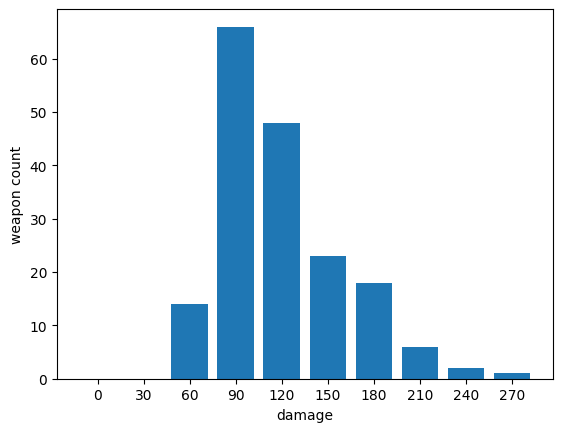

In [11]:
# TODO: add visualizations here
import matplotlib.pyplot as plt
names = [weapon[0] for weapon in closeRange]
damage = [int(weapon[2]) for weapon in closeRange]
damageLevels = [0,0,0,0,0,0,0,0,0,0]
for weapon in closeRange:
    damageLevels[int(weapon[2] // 30)] += 1


plt.bar([str(i*30) for i in range (len(damageLevels) )], damageLevels)
plt.xlabel('damage')
plt.ylabel('weapon count')
plt.show()


This visualization shows that most of the close range weapons in Dark Souls III has damage from 90 to 120. There are a few weapons goes above 200, and they should be the stronger weapons for players to use


([<matplotlib.patches.Wedge at 0x1362479a0>,
 [Text(1.098945736312627, 0.048148402261119716, 'Fists'),
  Text(1.0557501385179107, 0.3088553788092619, 'Small Shields'),
  Text(0.871159295200061, 0.6716259988911485, 'Greatshields'),
  Text(0.6763838716520124, 0.867470378842433, 'Bows'),
  Text(0.48268918101034686, 0.9884387459704121, 'Staves'),
  Text(0.2681905950330643, 1.066805420278605, 'Chimes'),
  Text(0.12615175686506336, 1.0927423000139869, 'Pikes'),
  Text(-0.102200450177511, 1.0952420134305998, 'Great Hammers'),
  Text(-0.3943920917180695, 1.0268665336791565, 'Halberds'),
  Text(-0.5877819283612289, 0.9297915920742429, 'Crossbows'),
  Text(-0.8008756850708774, 0.7540544655807385, 'Greatswords'),
  Text(-0.9692250873436161, 0.5201948962300187, 'Katanas'),
  Text(-1.0557501421325515, 0.30885536645345435, 'Ultra Greatswords'),
  Text(-1.099736402459455, -0.024079973121583005, 'Straight Swords'),
  Text(-1.0246925922355283, -0.40000636422141256, 'Curved Swords'),
  Text(-0.913360343

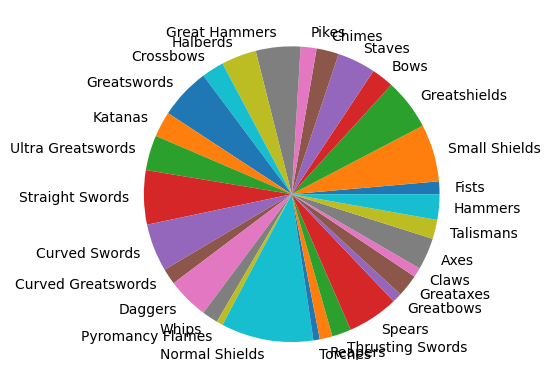

In [12]:
plt.pie(category.values(), labels=category.keys())

From the pie chart we can see that Normal Shields are most frequent in the game

## Part 6 - Conclusion

describe the results of your calculations / analysis
describe whether or not they were able to answer your questions
if you were unable to reach any conclusions, discuss why this was the case

I collected data of weapons in Dark Souls III and seperated all the weapons into 4 types: close range, spell, range, and shield. Then I calculated the mean damage with all the categories. I focus more on the close range weapon and calculated the mean, standard devation,a dn outlier regarding the damage. Form the visualization I conclude that the weapon the 200 and more damage are rare thus they will be more powerful the game.

I can answer the first answer now, that is the weapon with the highest damage in close range, range. The one with hight spell boost in spell, the one with highest stability in shield.

However, I cannot answer my second question. That's because shields are very different from regular weapons, and to answer the seond requires me to dive deeper into the stats of the shields. I did not do that here.